In [46]:
import matplotlib.ticker as ticker
from pymongo import MongoClient
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [19]:
baseline_auc = {
    'name': 'baseline',
    0: {0: 0.5441, 2: 0.7340, 4: 0.6161, 6: 0.7392},
    1: {0: 0.6715, 2: 0.6153, 4: 0.8833, 6: 0.7455},
    2: {0: 0.9619, 2: 0.7897, 4: 0.9430, 6: 0.6959},
    3: {1: 0.8136, 2: 0.8597, 3: 0.6330, 4: 0.8445},
    4: {1: 0.7807, 2: 0.6416, 3: 0.7535},
    5: {0: 0.6876, 2: 0.6818, 4: 0.7430, 6: 0.5390}
    }
    
INVERSE_CLASS_MAP = {
    0: 'fan',
    1: 'pump',
    2: 'slider',
    3: 'ToyCar',
    4: 'ToyConveyor',
    5: 'valve'
}

TRAINING_ID_MAP = {
    0: [0, 2, 4, 6],
    1: [0, 2, 4, 6],
    2: [0, 2, 4, 6],
    3: [1, 2, 3, 4],
    4: [1, 2, 3],
    5: [0, 2, 4, 6]
}

In [35]:
def get_experiment(name='per_mic_normalized', metric='auroc_mean'):
    
    client = MongoClient('mongodb://student2.cp.jku.at:27017/')
    db = client.dcase2020_task2
    db.list_collection_names()

    
    experiment_dict = dict()
    for i in range(6):
        experiment_dict[i] = dict()
    
    experiment_dict['name'] = name
    experiment_dict['matric'] = metric
    
    for experiment in db.runs.find(
            {
             "experiment.name": "dcase2020_task2_classification"
            }
    ):
        if experiment['config'].get('descriptor') == name:
            machine_dict = experiment_dict[experiment['config']['machine_type']]
            machine_dict[experiment['config']['machine_id']] = experiment['result'][metric]

    return experiment_dict


def get_record(experiment):
    record = [experiment['name']]
    for i in range(6):
        for j in TRAINING_ID_MAP[i]:
            if experiment['name'] == 'not_normalized' and i ==3 and j == 4 and experiment['matric'] == 'auroc_mean':
                record.append(0.9975)
            elif experiment['name'] == 'not_normalized' and i ==3 and j == 4 and experiment['matric'] == 'pauroc_mean':
                record.append(0.9867)
            else:
                record.append(experiment[i][j])
    assert len(record) == 24
    return  record

In [22]:
data = [
    get_record(baseline_auc),
    get_record(get_experiment('per_mic_norm_same_mic_comp')),
    get_record(get_experiment('per_mic_normalized')),
    # get_record(get_experiment('not_normalized'))
]

In [31]:
rec = get_record(get_experiment('no_raw_no_normalization'))
data.append(rec)

In [36]:
rec = get_record(get_experiment('not_normalized'))
data.append(rec)

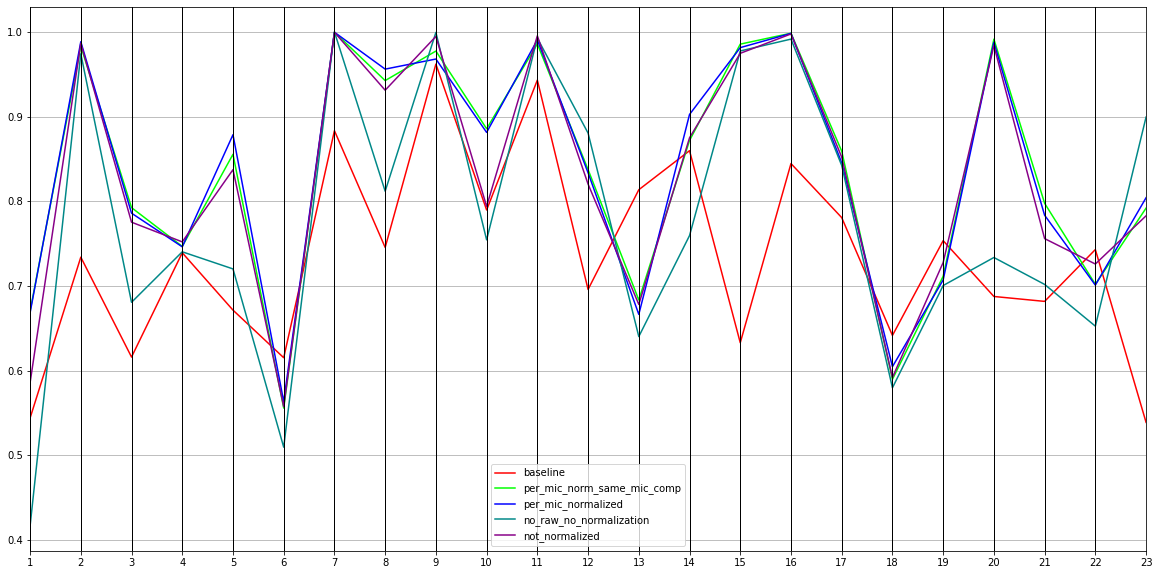

In [44]:
df = pd.DataFrame(data)

plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df, 0, color=('#FF0000', '#00FF00', '#0000FF', '#008888', '#880088'))
plt.legend(loc='lower center')
plt.show()

In [48]:
data_ = np.array(data)[:,1:]
data_ = data_[1:] - data_[:1]

df = pd.DataFrame(data_, 0)

plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(df, 0, color=('#FF0000', '#00FF00', '#0000FF', '#008888', '#880088'))
plt.legend(loc='lower center')
plt.show()

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U26'), dtype('<U26')) -> dtype('<U26')

In [49]:
data_

array([['0.5441', '0.734', '0.6161', '0.7392', '0.6715', '0.6153',
        '0.8833', '0.7455', '0.9619', '0.7897', '0.943', '0.6959',
        '0.8136', '0.8597', '0.633', '0.8445', '0.7807', '0.6416',
        '0.7535', '0.6876', '0.6818', '0.743', '0.539'],
       ['0.6702702702702703', '0.983091922005571', '0.792471264367816',
        '0.7467036011080332', '0.8554545454545455', '0.5558558558558558',
        '0.9994999999999999', '0.9424509803921568', '0.977303370786517',
        '0.8855805243445694', '0.9857303370786517', '0.8374157303370786',
        '0.6834632034632034', '0.8717196765498654', '0.9854770889487872',
        '0.9983396226415094', '0.8591749999999998', '0.5898169014084507',
        '0.7114914770223342', '0.9913445378151261', '0.7975833333333333',
        '0.7020000000000001', '0.7919166666666666'],
       ['0.6682800982800983', '0.988300835654596', '0.785919540229885',
        '0.7462326869806095', '0.8785314685314686', '0.5635135135135134',
        '0.9994999999999999'